# **Supervised Learning**

## Metaverse Financial Transactions

<img src="../images/ia.jpg" alt="Inteligência Artificial">

## **Introduction**

### **About Dataset**

The Metaverse Financial Transactions Dataset offers a comprehensive collection of blockchain-based financial activities within the Open Metaverse. With 78,600 transactions, it provides detailed attributes like timestamps, addresses, transaction types, and risk scores. This dataset supports research in fraud detection, risk assessment, and user behavior analysis in virtual environments. It's curated to reflect the complexity of blockchain activities, aiding the development of secure digital asset management. 

### **About the Problem**

The objective of this project is to develop predictive models for anomaly detection, fraud analysis, and risk assessment in financial transactions within the Metaverse. This constitutes a multivariate classification problem, where the aim is to categorize transactions into different risk levels based on attributes such as transaction type, user behavior, and transaction amount. The target variable is the risk level, which can be categorized as high risk, moderate risk, or low risk.

### **About the Solution**

The solution to this problem involves employing supervised learning techniques on the provided Metaverse Financial Transactions Dataset. A portion of the dataset will be designated as the training set, utilized to train the model, while another portion will serve as the test set for model evaluation.

The chosen supervised learning algorithm will undergo training on the training set, learning patterns and relationships between various attributes of Metaverse financial transactions. Subsequently, the trained model will be evaluated using the test set to assess its performance and generalization ability.

The primary evaluation metric for this solution will be accuracy, representing the percentage of correctly classified transactions by the model. Achieving high accuracy is crucial for ensuring the effectiveness of the model in accurately categorizing transactions into their respective risk levels.

---

This project was made by:

| Name | UP |
|-|-|
| Ana Carolina Coutinho | up202108685 |
| José Costa | upxxxx |
| Afonso Poças | upxxxx |


### Library Installation

Before proceeding, make sure you have the necessary libraries installed for this project. 
Open your terminal and navigate to the project's root directory. Then, run the following command:

```bash
pip install -r requirements.txt
```

After installing the required libraries, import them into your project. 
Also, let's suppress any warnings to keep the notebook clean and organized.


### Create a dataframe with the dataset from the csv file

Firstly, we import the necessary libraries, packages and methods.

In [22]:
import warnings # Needed to ignore warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, KFold
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import KernelPCA
from imblearn.under_sampling import AllKNN
from xgboost import XGBClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import AllKNN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score, ConfusionMatrixDisplay

warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('../data/metaverse_transactions_dataset.csv')

df.head()

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.75,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.00,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.25,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.75,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.50,moderate_risk


In [ ]:
print("There are " + str(df.shape[0]) + " rows and " + str(df.shape[1]) + " cols in the dataset")

There are 78600 rows and 14 cols in the dataset


# Data preprocessing

### Pre analysis

This should be done before any data manipulation, to get a better understanding of the data and filter out any outliers.

In [ ]:
df.describe()

,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score
count,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,11.532634,502.574903,147.644430,4.178702,69.684606,44.956722
std,6.935897,245.898146,69.388143,2.366038,40.524476,21.775365
min,0.000000,0.010000,10.000000,1.000000,20.000000,15.000000
25%,6.000000,331.319966,172.000000,2.000000,35.000000,26.250000
50%,12.000000,500.029500,172.160000,4.000000,60.000000,40.000000
75%,18.000000,669.528311,192.000000,6.000000,100.000000,52.500000
max,23.000000,1557.150905,192.168000,8.000000,159.000000,100.000000


In [ ]:
df.dtypes

timestamp             object
hour_of_day            int64
sending_address       object
receiving_address     object
amount               float64
transaction_type      object
location_region       object
ip_prefix            float64
login_frequency        int64
session_duration       int64
purchase_pattern      object
age_group             object
risk_score           float64
anomaly               object
dtype: object

In [ ]:
# check missing values
df.isna().any()

timestamp            False
hour_of_day          False
sending_address      False
receiving_address    False
amount               False
transaction_type     False
location_region      False
ip_prefix            False
login_frequency      False
session_duration     False
purchase_pattern     False
age_group            False
risk_score           False
anomaly              False
dtype: bool

In [ ]:
# realiza uma filtragem de dados para remover outliers
coluna_alvo = 'amount'

Q1 = df[coluna_alvo].quantile(0.25)
Q3 = df[coluna_alvo].quantile(0.75)

IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

data_filtrado = df[(df[coluna_alvo] > limite_inferior) & (df[coluna_alvo] < limite_superior)]

In [ ]:
# converte valores categóricos em valores numéricos
categorical_cols = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print(df.head())

   timestamp  hour_of_day  sending_address  receiving_address      amount  \
0      21675           12              700                276  796.949206   
1      35368           19              960                369    0.010000   
2       3832           16              227                375  778.197390   
3      35500            9              664                629  300.838358   
4      10533           14              771                508  775.569344   

   transaction_type  location_region  ip_prefix  login_frequency  \
0                 4                2    192.000                3   
1                 1                4    172.000                5   
2                 1                1    192.168                3   
3                 4                4    172.000                8   
4                 2                0    172.160                6   

   session_duration  purchase_pattern  age_group  risk_score  anomaly  
0                48                 0          0       1

## Data Analysis

We will now perform data analysis to gain a better understanding of our dataset.

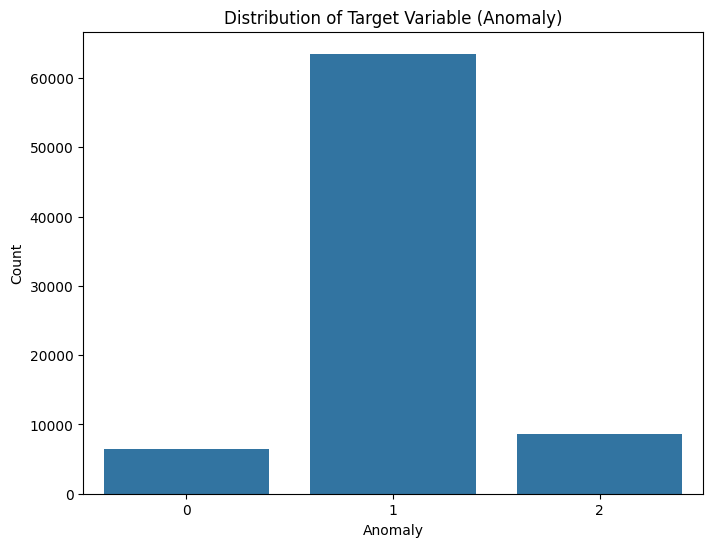

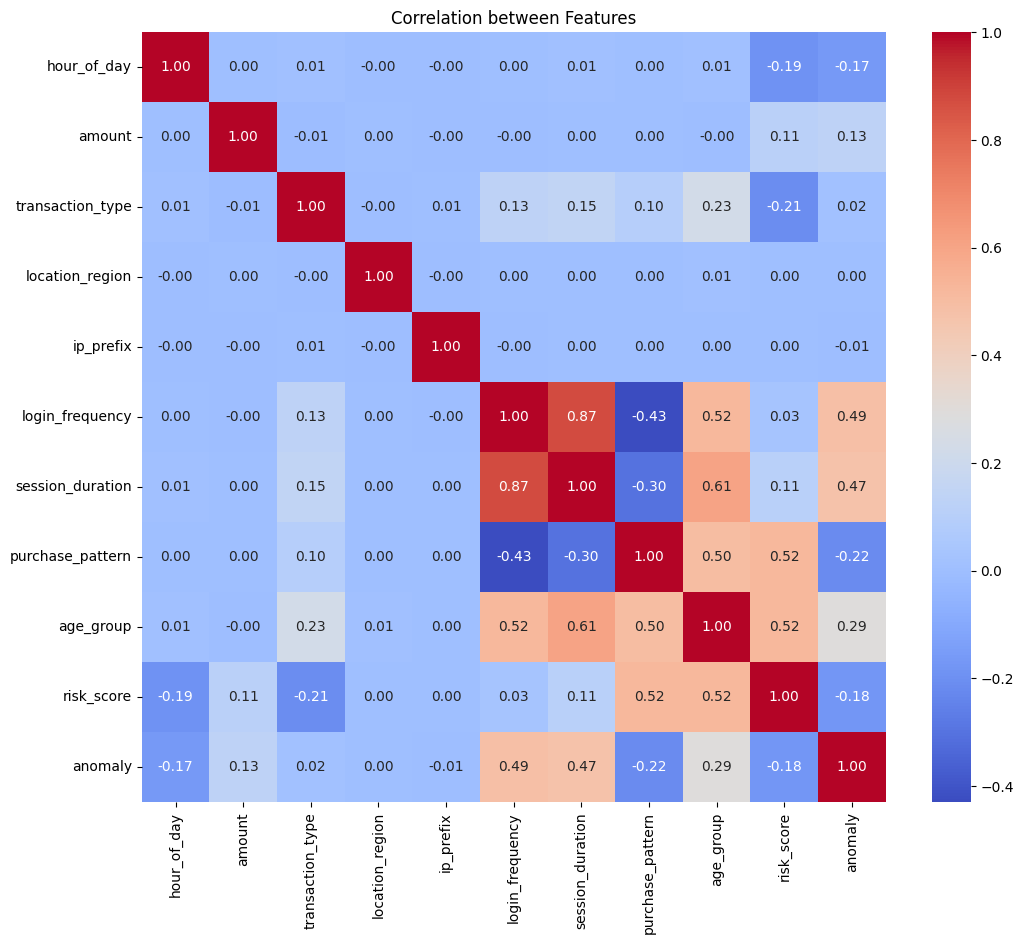

In [ ]:
import seaborn as sns
# O primeiro gráfico mostra a contagem de ocorrências de cada classe da variável alvo ("anomaly")
plt.figure(figsize=(8, 6))
sns.countplot(x='anomaly', data=df)
plt.title('Distribution of Target Variable (Anomaly)')
plt.xlabel('Anomaly')
plt.ylabel('Count')
plt.show()

df_corr = df.drop(columns=['timestamp', 'sending_address', 'receiving_address'])

# O mapa de calor mostra a correlação entre as features
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Features')
plt.show()


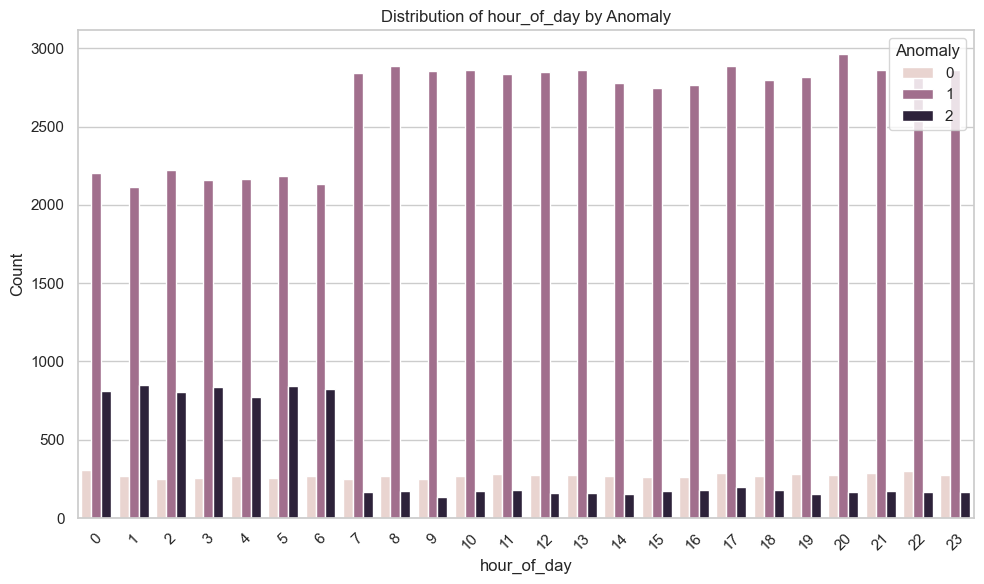

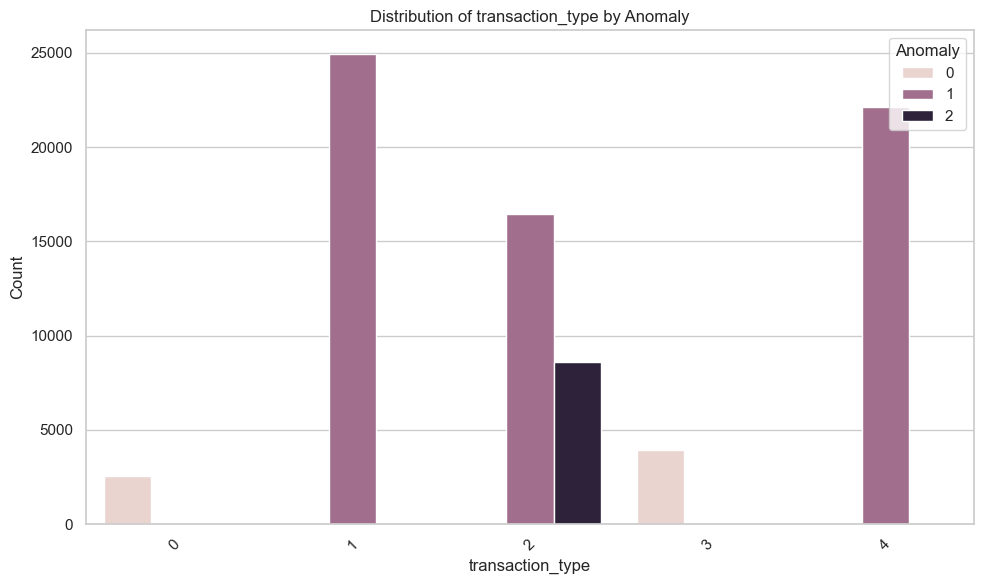

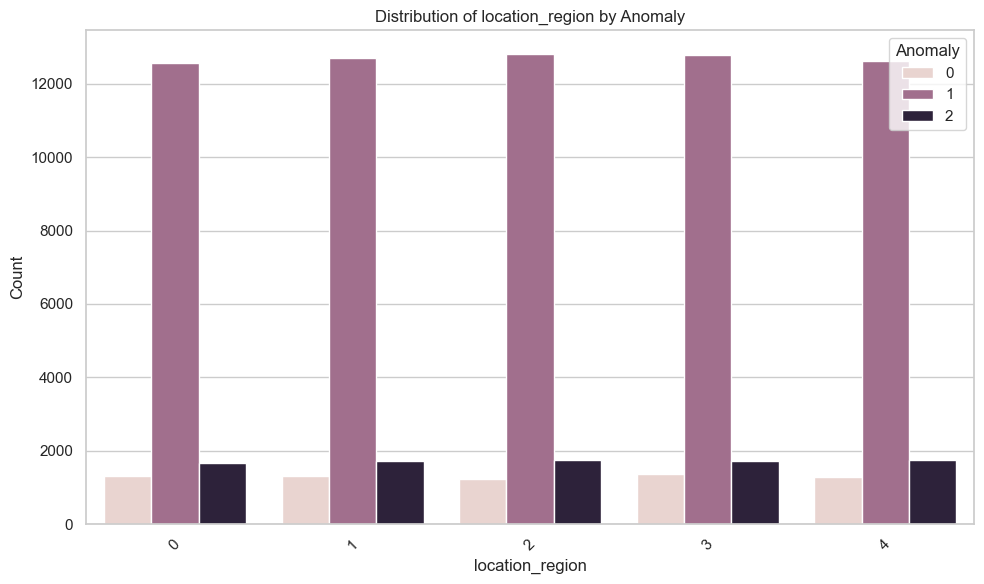

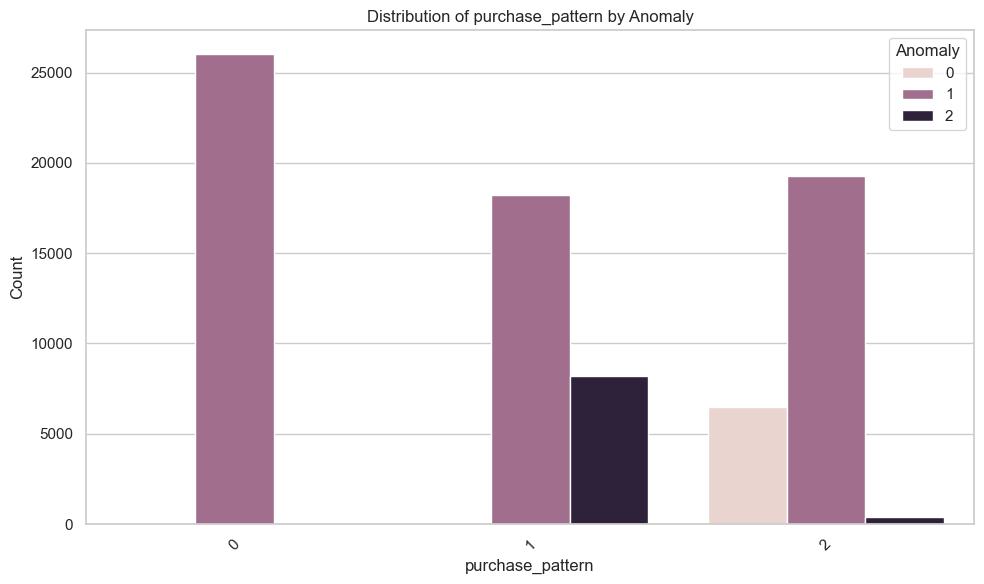

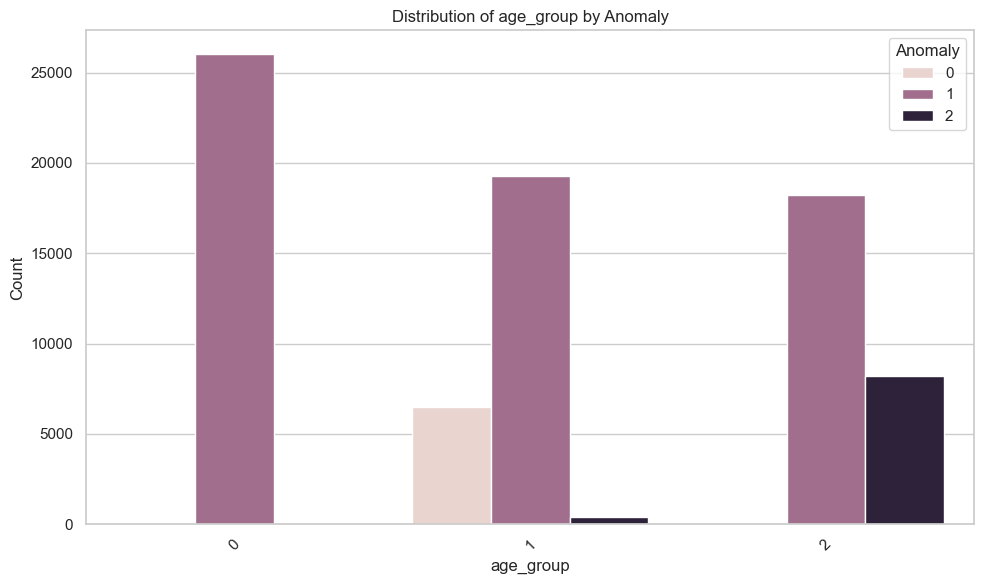

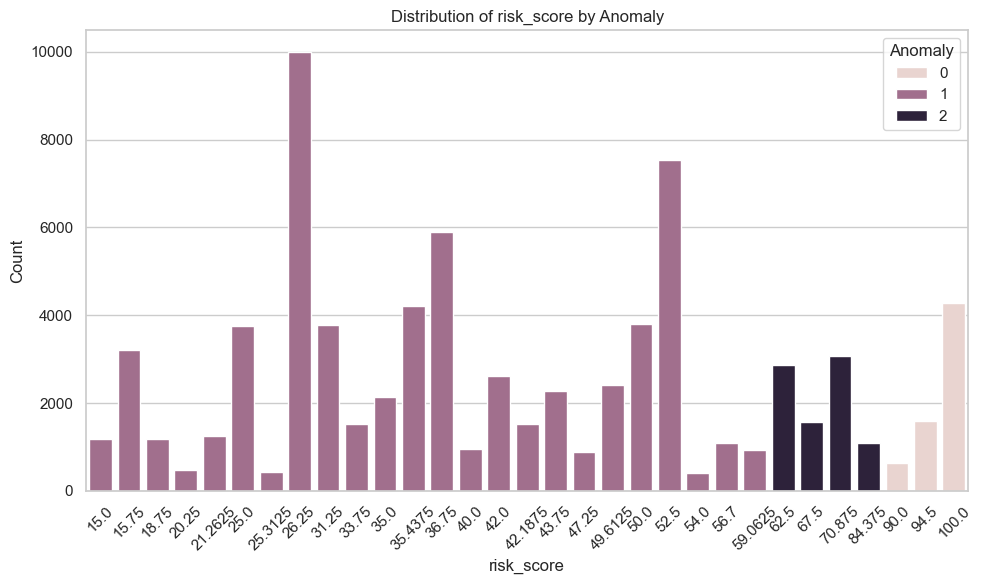

In [ ]:
# distribuição de diferentes variáveis categóricas em relação à variável alvo 'anomaly' 

sns.set(style="whitegrid")

categorical_cols = ['hour_of_day', 'transaction_type', 'location_region', 'purchase_pattern', 'age_group', 'risk_score']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='anomaly')
    plt.title(f'Distribution of {col} by Anomaly')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Anomaly', loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Estatísticas Descritivas:         hour_of_day        amount     ip_prefix  login_frequency  \
count  78600.000000  78600.000000  78600.000000     78600.000000   
mean      11.532634    502.574903    147.644430         4.178702   
std        6.935897    245.898146     69.388143         2.366038   
min        0.000000      0.010000     10.000000         1.000000   
25%        6.000000    331.319966    172.000000         2.000000   
50%       12.000000    500.029500    172.160000         4.000000   
75%       18.000000    669.528311    192.000000         6.000000   
max       23.000000   1557.150905    192.168000         8.000000   

       session_duration    risk_score  
count      78600.000000  78600.000000  
mean          69.684606     44.956722  
std           40.524476     21.775365  
min           20.000000     15.000000  
25%           35.000000     26.250000  
50%           60.000000     40.000000  
75%          100.000000     52.500000  
max          159.000000    100.000000  


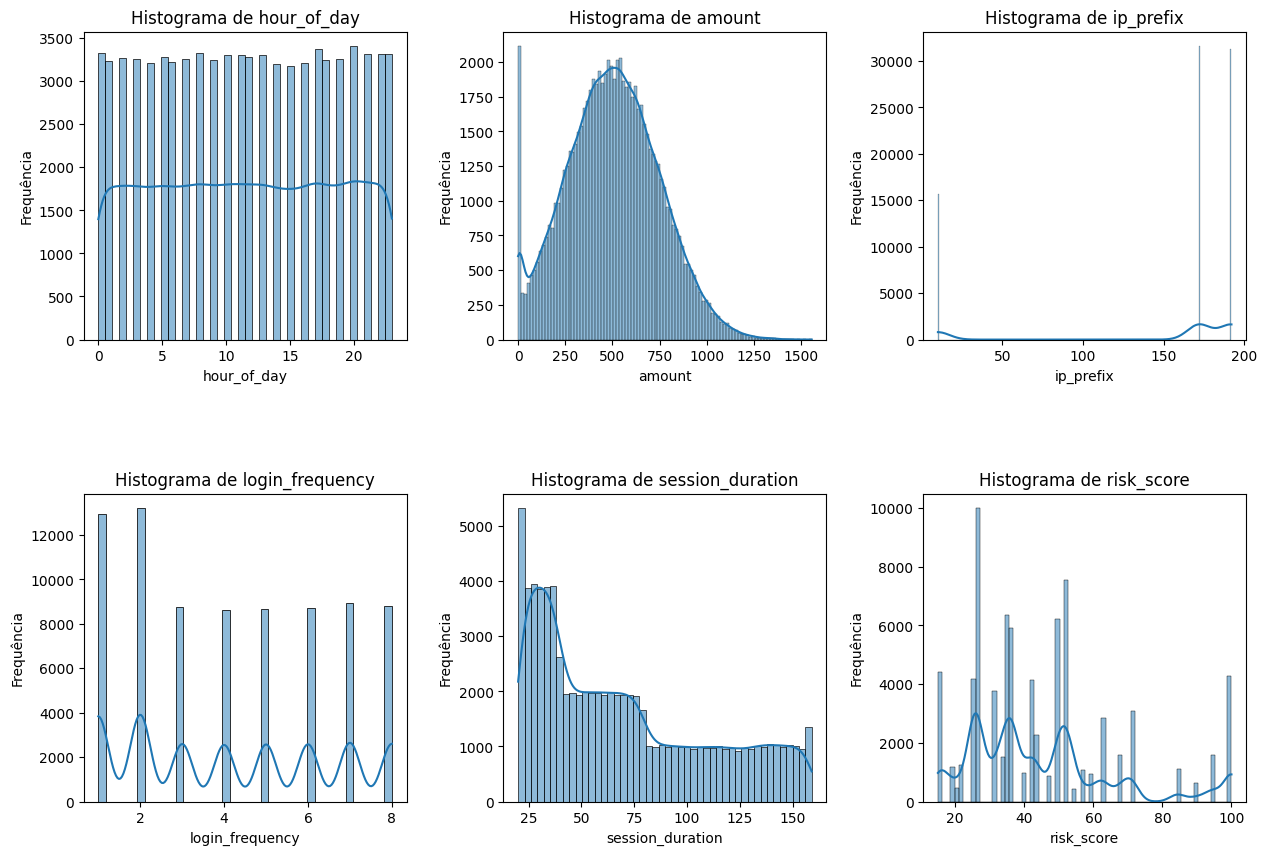

In [ ]:
# estatísticas descritivas
desc_stats = df.describe()
print("Estatísticas Descritivas:", desc_stats)

# distribuição de cada atributo
import seaborn as sns
import matplotlib.pyplot as plt

# histogramas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(numeric_cols)
cols_per_row = 3
rows = num_plots // cols_per_row + (num_plots % cols_per_row > 0)

fig, axs = plt.subplots(rows, cols_per_row, figsize=(cols_per_row*5, rows*5))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for idx, col in enumerate(numeric_cols):
    row = idx // cols_per_row
    col_idx = idx % cols_per_row
    sns.histplot(df[col], kde=True, ax=axs[row, col_idx])
    axs[row, col_idx].set_title(f'Histograma de {col}')
    axs[row, col_idx].set_xlabel(col)
    axs[row, col_idx].set_ylabel('Frequência')

for ax in axs.flat[num_plots:]:
    ax.set_visible(False)

plt.show()



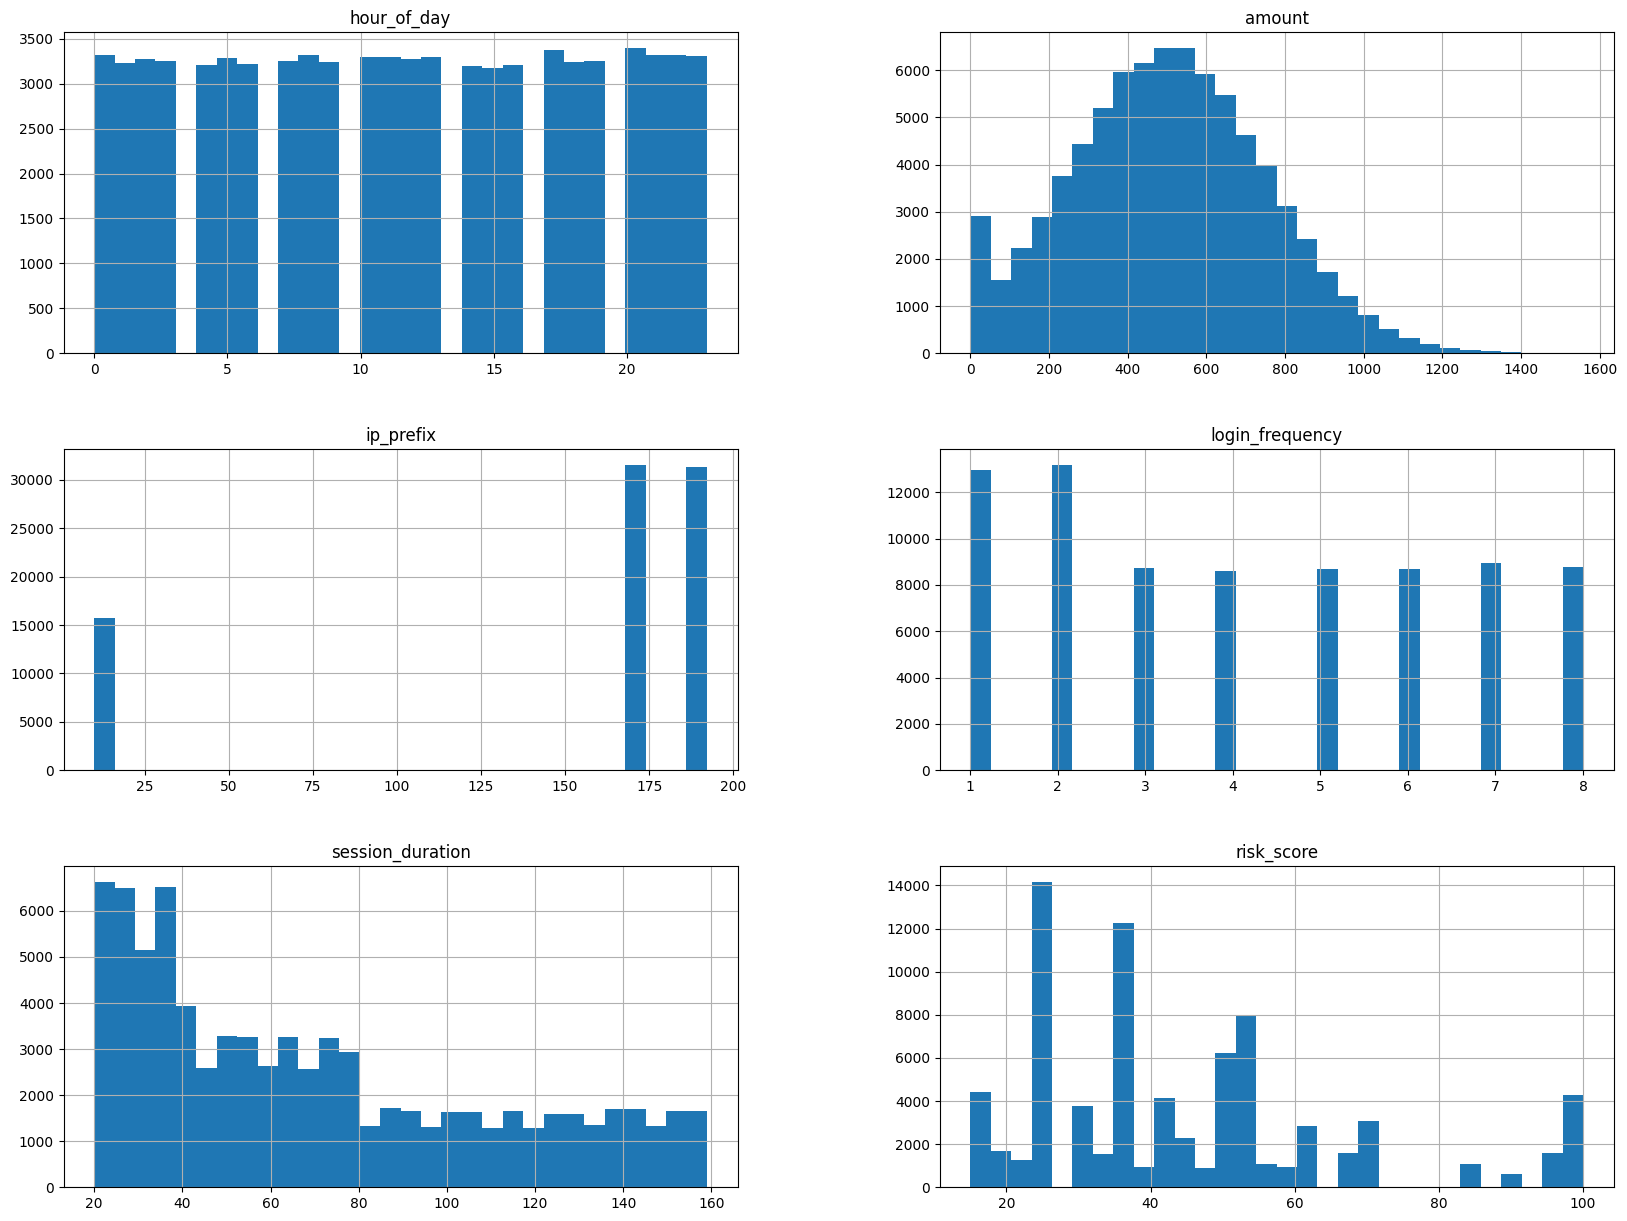

In [ ]:
df.describe()

df.hist(bins=30, figsize=(20, 15))
plt.show()



From this analysis, we can observe key insights that enhance our understanding of the dataset and guide our modeling decisions. The variation in transaction amounts and session durations across different risk categories suggests these features are valuable predictors of anomaly. Additionally, the correlation heatmap highlights important relationships between features, such as the link between login frequency and session duration, which can inform our feature selection. Lastly, the encoding of categorical variables and their distribution analysis reveals patterns that could be crucial for predicting higher risk transactions. These findings lay a solid groundwork for our next steps in model development and anomaly detection.

## Prepare the dataframe for model training

### Split the dataset into train and test sets

## Model training

### Select the best model
